In [1]:
import paquo
from paquo.projects import QuPathProject

qp = QuPathProject('/Users/lollijagladiseva/Desktop/visium_hd_sandbox/hd_sandbox/crc_nuc_qupath/project.qpproj')

ImageEntries(['Visium_HD_Human_Colon_Cancer_P5_tissue_image.btf.ome.tif - 20x_BF_01'])
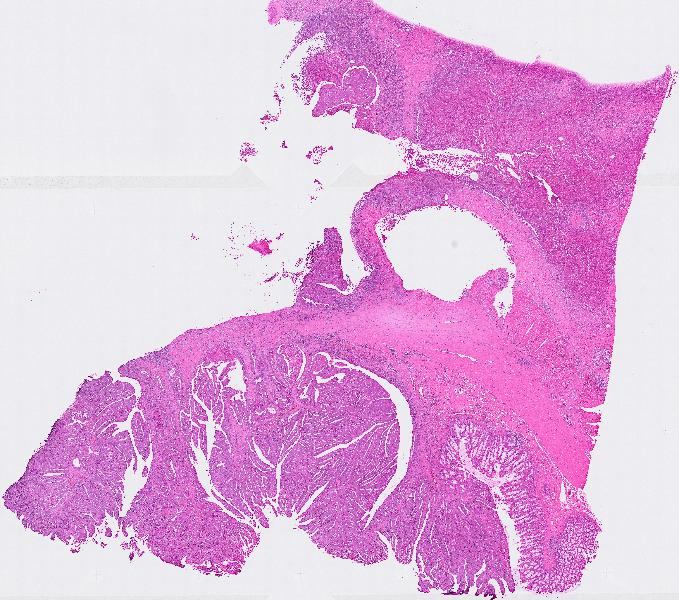

In [2]:
qp.images 

In [3]:
qp.is_readable()

{'file:/Users/lollijagladiseva/Documents/wsi/Visium_HD_Human_Colon_Cancer_P5_tissue_image.btf.ome.tif': True}

In [4]:
qp.path_classes

(QuPathPathClass('Rectangle'), QuPathPathClass('roi_cropped'))

In [2]:
image = qp.images[0]  # get the first image
image.hierarchy.annotations  # annotations are stored in a set like proxy object




11:41:15.098 [main] [DEBUG] qupath.lib.io.PathIO - Read: {"dataVersion":3,"qupathVersion":"0.5.1","server":{"builderType":"uri","providerClassName":"qupath.lib.images.servers.bioformats.BioFormatsServerBuilder","uri":"file:/Users/lollijagladiseva/Documents/wsi/Visium_HD_Human_Colon_Cancer_P5_tissue_image.btf.ome.tif","args":["--series","0"],"metadata":{"name":"Visium_HD_Human_Colon_Cancer_P5_tissue_image.btf.ome.tif - 20x_BF_01","width":72897,"height":64370,"sizeZ":1,"sizeT":1,"channelType":"DEFAULT","isRGB":true,"pixelType":"UINT8","levels":[{"downsample":1.0,"width":72897,"height":64370},{"downsample":2.0,"width":36448,"height":32185},{"downsample":4.0,"width":18224,"height":16092},{"downsample":8.0,"width":9112,"height":8046}],"channels":[{"name":"Red","color":-65536},{"name":"Green","color":-16711936},{"name":"Blue","color":-16776961}],"pixelCalibration":{"pixelWidth":{"value":0.27381122347640885,"unit":"µm"},"pixelHeight":{"value":0.27381212760850293,"unit":"µm"},"zSpacing":{"valu

<PathObjectProxy hierarchy=Hierarchy(image=Visium_HD_Human_Colon_Cancer_P5_tissue_image.btf.ome.tif - 20x_BF_01, annotations=1582, detections=0) paquo_cls=QuPathPathAnnotationObject mask=None at 0x0x1114ced50>

In [6]:
for annotation in image.hierarchy.annotations:
    if annotation.path_class is not None:
        print(annotation.name, annotation.path_class, annotation.roi)

None QuPathPathClass('Rectangle') POLYGON ((31001 39422, 32139 39422, 32139 40596, 31001 40596, 31001 39422))
None QuPathPathClass('Rectangle') POLYGON ((32146 38327, 33320 38327, 33320 40614, 32146 40614, 32146 38327))
None QuPathPathClass('Rectangle') POLYGON ((32384 40615, 33331 40615, 33331 40828, 32384 40828, 32384 40615))
None QuPathPathClass('Rectangle') POLYGON ((33318 38319, 33515 38319, 33515 38987, 33318 38987, 33318 38319))
None QuPathPathClass('Rectangle') POLYGON ((31783 38058, 32142 38058, 32142 38405, 31783 38405, 31783 38058))
None QuPathPathClass('Rectangle') POLYGON ((33331 40109, 33459 40109, 33459 40827, 33331 40827, 33331 40109))
None QuPathPathClass('Rectangle') POLYGON ((32770 38120, 32992 38120, 32992 38329, 32770 38329, 32770 38120))
None QuPathPathClass('roi_cropped') POLYGON ((30713 37928, 33865 37928, 33865 41044, 30713 41044, 30713 37928))


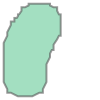

In [7]:
annotation = image.hierarchy.annotations[0]
annotation.roi



In [8]:
filtered_annotations = [annotation for annotation in image.hierarchy.annotations if annotation.name is not None]
filtered_annotations

[]

In [3]:
import geopandas as gpd
from shapely.wkt import loads
import paquo
# List to store polygon geometries
geometries = []
path_classes = []

# Iterate over annotations in the image hierarchy
for annotation in image.hierarchy.annotations:
    # Ensure annotation.roi is not None and is a Shapely Polygon object
    if annotation.roi:
        # Directly append the Polygon object to the list of geometries
        geometries.append(annotation.roi)
        path_classes.append(annotation.path_class.name if annotation.path_class else None)

data = {'geometry': geometries, 'path_class': path_classes}
gdf = gpd.GeoDataFrame(data)  # Specify CRS if known (e.g., EPSG:4326 for WGS84)

# Optionally, you can save the GeoDataFrame to a GeoJSON file
gdf.to_file('../data/processed/dataframe_ground_truth.geojson', driver='GeoJSON')


# Print GeoDataFrame info
print(gdf.head())


                                            geometry path_class
0  POLYGON ((32930.000 38323.000, 32928.000 38324...       None
1  POLYGON ((32858.000 38322.000, 32856.000 38323...       None
2  POLYGON ((32156.000 40557.000, 32155.000 40558...       None
3  POLYGON ((32170.000 40590.000, 32169.000 40591...       None
4  POLYGON ((32131.000 40580.000, 32130.000 40581...       None
